CALIBRATION

Joint Calibration (Triplicate Dataset, CI Output)


Joint Fit Parameters (±95% CI):
μmax-H: 0.4956 ± 0.29
Ks: 0.08788 ± 0.083
Ki: 0.2196 ± 0.21
Pso4_max: 0.1258 ± 0.0036
ms: 1e-05 ± 0.00011
k_so: 1e-05 ± 0.024
μmax-true = 0.2188 h⁻¹
n = 1.6000
S_max_h = 0.1389 M


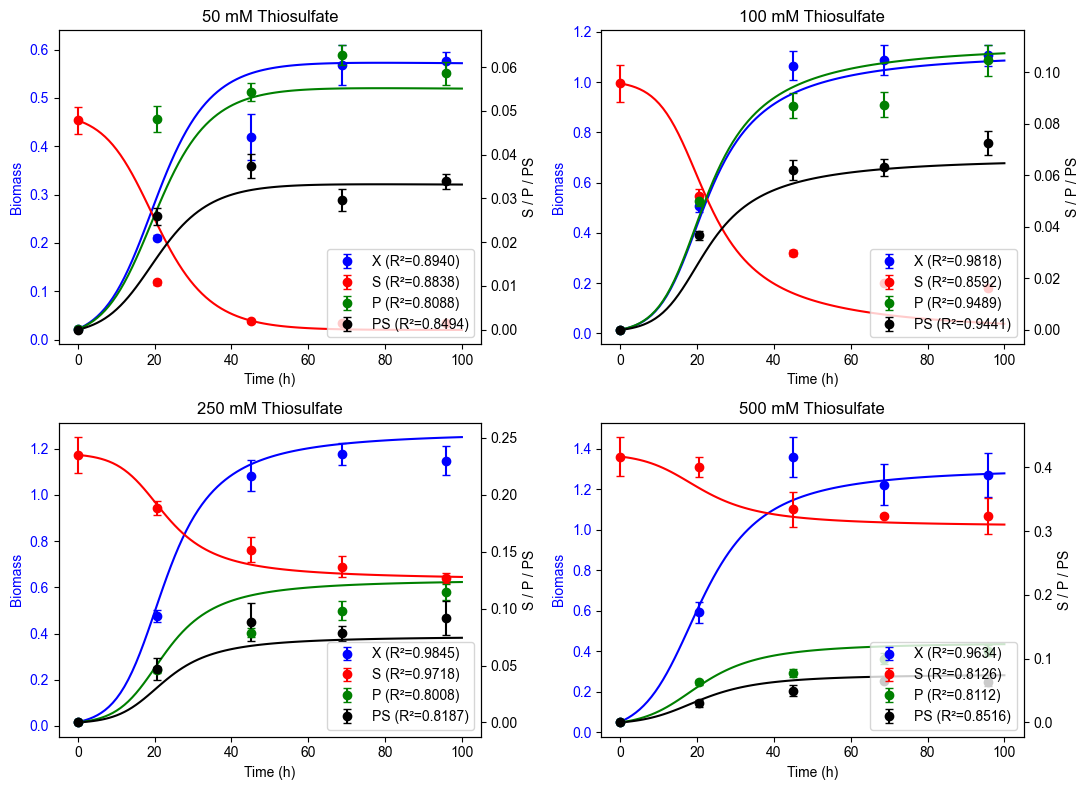

In [ ]:
# ========================== JOINT DATASET CALIBRATION ==========================

# -------- Import Libraries --------
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit
from scipy.stats import sem, t

# ===================== LOAD AND ORGANIZE DATASETS =====================
# -------- Triplicate Experimental Data --------
t_data = np.array([0.00, 20.58, 45.02, 68.72, 95.80])  # Incubation time same for all

# Datasets: Biomass (X), Substrate (S), Sulfate (P), Elemental Sulfur (PS)
datasets_trip = {
    "50 mM": {
        "X": np.array([
            [0.0223, 0.2083, 0.4372, 0.5738, 0.5847],
            [0.0212, 0.2114, 0.4208, 0.5495, 0.5724],
            [0.0210, 0.2127, 0.3984, 0.5818, 0.5699]
        ]),
        "S": np.array([
            [0.0493, 0.0107, 0.0018, 0.0016, 0.0016],
            [0.0471, 0.0111, 0.0020, 0.0017, 0.0016],
            [0.0471, 0.0106, 0.0019, 0.0015, 0.0016]
        ]),
        "P": np.array([
            [0.0001, 0.0484, 0.0548, 0.0638, 0.0577],
            [0.0001, 0.0468, 0.0534, 0.0627, 0.0598],
            [0.0001, 0.0491, 0.0549, 0.0619, 0.0583]
        ]),
        "PS": np.array([
            [0.0000, 0.0251, 0.0365, 0.0305, 0.0331],
            [0.0000, 0.0267, 0.0387, 0.0286, 0.0344],
            [0.0000, 0.0260, 0.0372, 0.0300, 0.0342]
        ])
    },
    "100 mM": {
        "X": np.array([
            [0.0142, 0.5177, 1.0781, 1.1037, 1.1271],
            [0.0137, 0.4983, 1.0804, 1.0619, 1.0996],
            [0.0137, 0.5038, 1.0389, 1.1028, 1.0961]
        ]),
        "S": np.array([
            [0.0990, 0.0523, 0.0292, 0.0182, 0.0167],
            [0.0942, 0.0530, 0.0298, 0.0184, 0.0161],
            [0.0937, 0.0510, 0.0301, 0.0183, 0.0166]
        ]),
        "P": np.array([
            [0.0001, 0.0500, 0.0892, 0.0861, 0.1025],
            [0.0001, 0.0512, 0.0853, 0.0865, 0.1073],
            [0.0001, 0.0494, 0.0865, 0.0896, 0.1040]
        ]),
        "PS": np.array([
            [0.0000, 0.0361, 0.0602, 0.0644, 0.0740],
            [0.0000, 0.0374, 0.0632, 0.0617, 0.0703],
            [0.0000, 0.0366, 0.0627, 0.0632, 0.0729]
        ])
    },
    "250 mM": {
        "X": np.array([
            [0.0162, 0.4788, 1.1108, 1.1631, 1.1773],
            [0.0170, 0.4631, 1.0578, 1.1976, 1.1370],
            [0.0176, 0.4825, 1.0803, 1.1676, 1.1306]
       ]),
        "S": np.array([
            [0.2418, 0.1911, 0.1472, 0.1376, 0.1247],
            [0.2293, 0.1867, 0.1561, 0.1328, 0.1275],
            [0.2341, 0.1876, 0.1524, 0.1400, 0.1283]
        ]),
        "P": np.array([
            [0.0001, 0.0450, 0.0805, 0.1017, 0.1170],
            [0.0001, 0.0472, 0.0790, 0.0981, 0.1116],
            [0.0001, 0.0458, 0.0772, 0.0951, 0.1151]
        ]),
        "PS": np.array([
            [0.0000, 0.0452, 0.0960, 0.0755, 0.0981],
            [0.0000, 0.0516, 0.0853, 0.0805, 0.0861],
            [0.0000, 0.0448, 0.0837, 0.0789, 0.0921]
        ])
    },
    "500 mM": {
        "X": np.array([
            [0.0510, 0.6100, 1.4000, 1.2326, 1.3000],
            [0.0535, 0.6005, 1.3200, 1.1800, 1.2200],
            [0.0524, 0.5700, 1.3567, 1.2600, 1.2894]
        ]),
        "S": np.array([
            [0.4306, 0.4072, 0.3308, 0.3243, 0.3123],
            [0.4145, 0.3946, 0.3463, 0.3251, 0.3346],
            [0.4065, 0.4004, 0.3255, 0.3232, 0.3258]
        ]),
        "P": np.array([
            [0.0001, 0.0646, 0.0812, 0.0971, 0.1163],
            [0.0001, 0.0617, 0.0765, 0.1043, 0.1091],
            [0.0001, 0.0620, 0.0772, 0.0995, 0.1130]
        ]),
        "PS": np.array([
            [0.0000, 0.0282, 0.0484, 0.0663, 0.0608],
            [0.0000, 0.0327, 0.0538, 0.0653, 0.0649],
            [0.0000, 0.0288, 0.0474, 0.0655, 0.0636]
        ])
    }
}

# ===================== UTILITY FUNCTIONS =====================
# --- Mean and 95% Confidence Interval ---
def mean_ci(data):
    mean = np.mean(data, axis=0)
    ci = sem(data, axis=0) * t.ppf(0.975, df=data.shape[0]-1)
    return mean, ci

# --- Root Mean Square Error ---
def calculate_rmse(observed, predicted): 
    return np.sqrt(np.mean((observed - predicted) ** 2))

# --- Coefficient of Determination (R²) ---
def r2(y_true, y_pred):
    return 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)


# ===================== PREPARE CALIBRATION DATASET (MEANS) =====================
datasets = {}
for key, val in datasets_trip.items():
    datasets[key] = {
        "t": t_data,
        "X": np.mean(val["X"], axis=0),
        "S": np.mean(val["S"], axis=0),
        "P": np.mean(val["P"], axis=0),
        "PS": np.mean(val["PS"], axis=0)
    }

# ===================== MODEL DEFINITION =====================
# -------- Fixed Model Parameters --------
Yxs = 11.6
Yps = 1.16
Yp2s = 0.7
Ks_switch = 0.010
Yso4_s0 = 0.00000
k = 1.6

# -------- Model function --------
def model(y, t, u, Ks, Ki, Pso4_max, ms, k_so):
    X, S, P, Ps = y
    mu = ((u * S) / (Ks + S + ((S**2) / Ki))) * (max(1e-6, 1 - P / Pso4_max) ** k)  #Eq. 10
    dXdt = mu * X                                                                   #Eq. 6
    r_so = k_so * Ps * X if S < Ks_switch else 0                                    #Eq. 17
    dSdt = (dXdt * (-1 / Yxs)) - ms * X                                             #Eq. 14
    dPdt = dXdt * (Yps / Yxs) + Yso4_s0 * r_so                                      #Eq. 15
    dP2dt = dXdt * (Yp2s / Yxs) - r_so                                              #Eq. 16
    return [dXdt, dSdt, dPdt, dP2dt]


# ===================== GLOBAL OBJECTIVE FUNCTION =====================
def global_objective(all_t, u, Ks, Ki, Pso4_max, ms, k_so):
    all_predictions = []
    for data in datasets.values():
        t_data = data["t"]
        y0 = [data["X"][0], data["S"][0], data["P"][0], data["PS"][0]]
        sol = odeint(model, y0, t_data, args=(u, Ks, Ki, Pso4_max, ms, k_so))
        all_predictions.extend(sol[:, 0])  # X
        all_predictions.extend(sol[:, 1])  # S
        all_predictions.extend(sol[:, 2])  # P
        all_predictions.extend(sol[:, 3])  # PS
    return np.array(all_predictions)

# ===================== STACK ALL EXPERIMENTAL DATA =====================
all_exp_data = []
all_t_dummy = []
for data in datasets.values():
    all_t_dummy.extend(data["t"])
    all_exp_data.extend(data["X"])
    all_exp_data.extend(data["S"])
    all_exp_data.extend(data["P"])
    all_exp_data.extend(data["PS"])
all_exp_data = np.array(all_exp_data)
all_t_dummy = np.array(all_t_dummy)

# ===================== PARAMETER FITTING =====================
initial_guess = [0.3, 0.05, 0.5, 0.100, 0.001, 0.001]  # [u, Ks, Ki, Pso4_max, ms, k_so]
bounds = (
    [0.001, 0.001, 0.1, 0.01, 0.00001, 0.00001],  # Lower bounds
    [5, 0.5, 2, 1, 0.01, 1.0]                     # Upper bounds
)

popt, pcov = curve_fit(
    lambda t, u, Ks, Ki, Pso4_max, ms, k_so: global_objective(t, u, Ks, Ki, Pso4_max, ms, k_so),
    all_t_dummy, all_exp_data,
    p0=initial_guess, bounds=bounds
)
u, Ks, Ki, Pso4_max, ms, k_so = popt

# ===================== PARAMETER CONFIDENCE INTERVALS =====================
dof = max(0, len(all_exp_data) - len(popt))
tval = t.ppf(0.975, dof) if dof > 0 else 1.96
perr = np.sqrt(np.diag(pcov))
ci_pm = tval * perr
param_names = ["μmax-H", "Ks", "Ki", "Pso4_max", "ms", "k_so"]

# ===================== DERIVED HALDANE METRICS =====================
umax_true = u / (1 + 2*(Ks/Ki)**0.5)               # True maximum specific growth rate, umax
S_max_h = (Ks * Ki)**0.5                           # Substrate concentration at which umax occurs, Smax

# ===================== PRINT OUTPUT =====================
print(f"\nJoint Fit Parameters (±95% CI):")
for i, name in enumerate(param_names):
    print(f"{name}: {popt[i]:.4g} ± {ci_pm[i]:.2g}")

print(f"μmax-true = {umax_true:.4f} h⁻¹")
print(f"n = {n:.4f}")
print(f"S_max_h = {S_max_h:.4f} M")

# ===================== PLOTTING MODEL FITS AND DATA =====================
fig, axes = plt.subplots(2, 2, figsize=(11, 8))
axes = axes.flatten()

for i, (key, data) in enumerate(datasets_trip.items()):
    t_points = t_data
    X_mean, X_ci = mean_ci(data["X"])
    S_mean, S_ci = mean_ci(data["S"])
    P_mean, P_ci = mean_ci(data["P"])
    PS_mean, PS_ci = mean_ci(data["PS"])

    # Simulate model
    y0 = [X_mean[0], S_mean[0], P_mean[0], PS_mean[0]]
    t_fine = np.linspace(0, 100, 100)
    sol = odeint(model, y0, t_fine, args=(u, Ks, Ki, Pso4_max, ms, k_so))
    X_fit, S_fit, P_fit, PS_fit = sol.T

    # Model values at measurement points
    X_pred = np.interp(t_points, t_fine, X_fit)
    S_pred = np.interp(t_points, t_fine, S_fit)
    P_pred = np.interp(t_points, t_fine, P_fit)
    PS_pred = np.interp(t_points, t_fine, PS_fit)

    # R2 & RMSE calculations
    r2_X = r2(X_mean, X_pred)
    r2_S = r2(S_mean, S_pred)
    r2_P = r2(P_mean, P_pred)
    r2_PS = r2(PS_mean, PS_pred)

    rmse_X = calculate_rmse(X_mean, X_pred)
    rmse_S = calculate_rmse(S_mean, S_pred)
    rmse_P = calculate_rmse(P_mean, P_pred)
    rmse_PS = calculate_rmse(PS_mean, PS_pred)

    # Plotting: Biomass (left y) and S/P/PS (right y)
    ax = axes[i]
    ax2 = ax.twinx()
    ax.plot(t_fine, X_fit, 'b-')
    ax.errorbar(t_points, X_mean, yerr=X_ci, fmt='o', color='b', capsize=3, label=f'X (R²={r2_X:.4f})')
    ax.set_ylabel("Biomass", color='b')
    ax.tick_params(axis='y', labelcolor='b')

    ax2.plot(t_fine, S_fit, 'r-')
    ax2.plot(t_fine, P_fit, 'g-')
    ax2.plot(t_fine, PS_fit, 'k-')
    ax2.errorbar(t_points, S_mean, yerr=S_ci, fmt='o', color='r', capsize=3, label=f'S (R²={r2_S:.4f})')
    ax2.errorbar(t_points, P_mean, yerr=P_ci, fmt='o', color='g', capsize=3, label=f'P (R²={r2_P:.4f})')
    ax2.errorbar(t_points, PS_mean, yerr=PS_ci, fmt='o', color='k', capsize=3, label=f'PS (R²={r2_PS:.4f})')
    ax2.set_ylabel("S / P / PS", color='k')
    ax2.tick_params(axis='y', labelcolor='k')

    ax.set_title(f"{key} Thiosulfate")
    ax.set_xlabel("Time (h)")

    # Combine both legends
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='lower right')

plt.tight_layout()
plt.show()


Joint Calibration (Single dataset)


Joint Fit Parameters:
μmax-H = 0.4949 h⁻¹
μmax-true = 0.2188 h⁻¹
Ks = 0.0877 mol/L
Ki = 0.2202 mol/L
n (fixed) = 1.6000
Pso4_max = 0.1258 mol/L
ms = 0.000010 mol/(g·h)
k_so = 0.000010 L/(g·h)
S_max_h = 0.1389 M


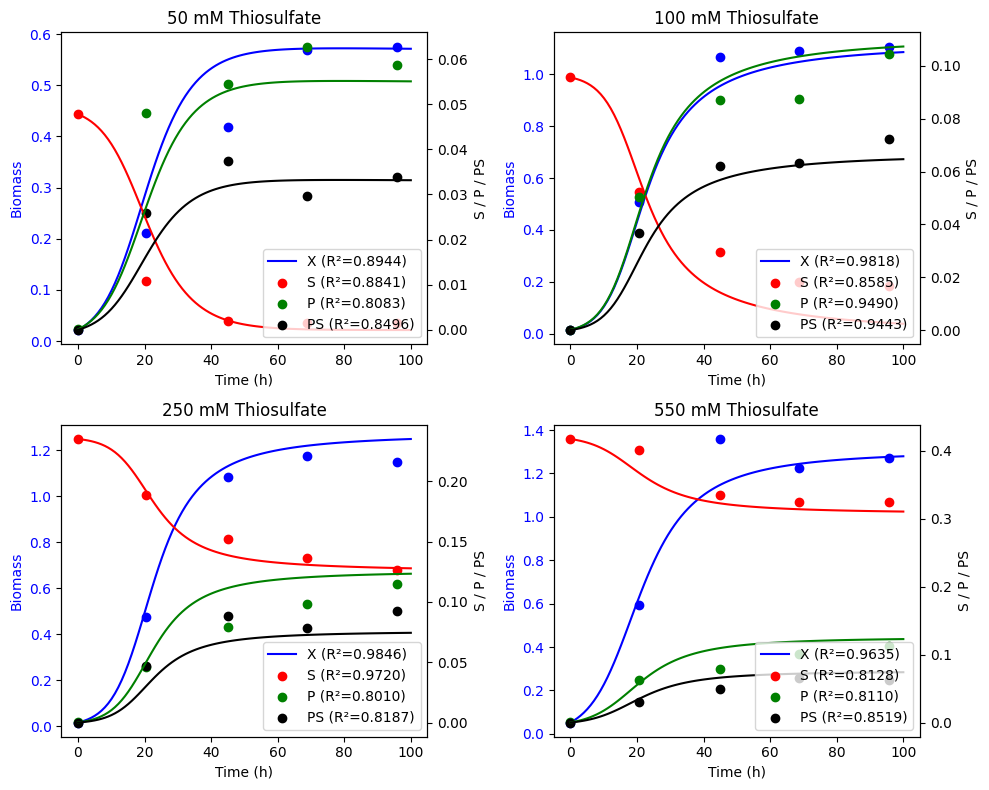

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit

# Fixed parameters
Yxs = 11.6
Yps = 1.16
Yp2s = 0.7
Ks_switch = 0.010
Yso4_s0 = 0.00000
n = 1.6

datasets = {
    "50 mM": {
        "t": np.array([0.00, 20.58, 45.02, 68.72, 95.80]),
        "X": np.array([0.0215, 0.2108, 0.4188, 0.5684, 0.5757]),
        "S": np.array([0.0478, 0.0108, 0.0019, 0.0016, 0.0016]),
        "P": np.array([0.0001, 0.0481, 0.0544, 0.0628, 0.0586]),
        "PS": np.array([0.0000, 0.0259, 0.0375, 0.0297, 0.0339])
    },
    "100 mM": {
        "t": np.array([0.00, 20.58, 45.02, 68.72, 95.80]),
        "X": np.array([0.0139, 0.5066, 1.0658, 1.0895, 1.1076]),
        "S": np.array([0.0956, 0.0521, 0.0297, 0.0183, 0.0165]),
        "P": np.array([0.0001, 0.0502, 0.0870, 0.0874, 0.1046]),
        "PS": np.array([0.0000, 0.0367, 0.0620, 0.0631, 0.0724])
    },
    "250 mM": {
        "t": np.array([0.00, 20.58, 45.02, 68.72, 95.80]),
        "X": np.array([0.0169, 0.4748, 1.0830, 1.1761, 1.1483]),
        "S": np.array([0.2351, 0.1885, 0.1519, 0.1368, 0.1268]),
        "P": np.array([0.0001, 0.0460, 0.0789, 0.0983, 0.1146]),
        "PS": np.array([0.0000, 0.0472, 0.0883, 0.0783, 0.0921])
    },
    "550 mM": {
        "t": np.array([0.00, 20.58, 45.02, 68.72, 95.80]),
        "X": np.array([0.0523, 0.5935, 1.3589, 1.2242, 1.2698]),
        "S": np.array([0.4172, 0.4007, 0.3342, 0.3242, 0.3242]),
        "P": np.array([0.0001, 0.0628, 0.0783, 0.1003, 0.1128]),
        "PS": np.array([0.0000, 0.0299, 0.0499, 0.0657, 0.0631])
    }
}

# Model definition
def model(y, t, u, Ks, Ki, Pso4_max, ms, k_so):
    X, S, P, Ps = y
    mu = ((u * S) / (Ks + S + ((S**2) / Ki))) * (max(1e-6, 1 - P / Pso4_max) ** n)
    dXdt = mu * X
    r_so = k_so * Ps * X if S < Ks_switch else 0
    dSdt = (dXdt * (-1 / Yxs)) - ms * X
    dPdt = dXdt * (Yps / Yxs) + Yso4_s0 * r_so
    dP2dt = dXdt * (Yp2s / Yxs) - r_so
    return [dXdt, dSdt, dPdt, dP2dt]

# Objective function across all datasets
def global_objective(all_t, u, Ks, Ki, Pso4_max, ms, k_so):
    all_predictions = []
    for data in datasets.values():
        t_data = data["t"]
        y0 = [data["X"][0], data["S"][0], data["P"][0], data["PS"][0]]
        sol = odeint(model, y0, t_data, args=(u, Ks, Ki, Pso4_max, ms, k_so))
        all_predictions.extend(sol[:, 0])  # X
        all_predictions.extend(sol[:, 1])  # S
        all_predictions.extend(sol[:, 2])  # P
        all_predictions.extend(sol[:, 3])  # PS
    return np.array(all_predictions)

# Combined experimental data
all_exp_data = []
all_t_dummy = []
for data in datasets.values():
    all_t_dummy.extend(data["t"])
    all_exp_data.extend(data["X"])
    all_exp_data.extend(data["S"])
    all_exp_data.extend(data["P"])
    all_exp_data.extend(data["PS"])
all_exp_data = np.array(all_exp_data)
all_t_dummy = np.array(all_t_dummy)

# Initial guesses and boundary conditions for u, Ks, Ki, Pso4_max, ms, k_so
initial_guess = [0.3, 0.05, 0.5, 0.100, 0.001, 0.001]  #Initial guess
bounds = ([0.001, 0.001, 0.1, 0.01, 0.00001, 0.00001], #Lower bound
          [5, 0.5, 2, 1, 0.01, 1.0])                   #Upper bound

# Parameter fitting
popt, _ = curve_fit(lambda t, u, Ks, Ki, Pso4_max, ms, k_so:
                    global_objective(t, u, Ks, Ki, Pso4_max, ms, k_so),
                    all_t_dummy, all_exp_data,
                    p0=initial_guess, bounds=bounds)

# Unpack results
u, Ks, Ki, Pso4_max, ms, k_so = popt

# Derived Haldane metrics
umax_true = u / (1 + 2*(Ks/Ki)**0.5)
S_max_h = (Ks * Ki)**0.5

print(f"\nJoint Fit Parameters:")
print(f"μmax-H = {u:.4f} h⁻¹")
print(f"μmax-true = {umax_true:.4f} h⁻¹")
print(f"Ks = {Ks:.4f} mol/L")
print(f"Ki = {Ki:.4f} mol/L")
print(f"n (fixed) = {n:.4f}")
print(f"Pso4_max = {Pso4_max:.4f} mol/L")
print(f"ms = {ms:.6f} mol/(g·h)")
print(f"k_so = {k_so:.6f} L/(g·h)")
print(f"S_max_h = {S_max_h:.4f} M")

# Plotting results
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, (key, data) in enumerate(datasets.items()):
    t_data = data["t"]
    y0 = [data["X"][0], data["S"][0], data["P"][0], data["PS"][0]]
    sol = odeint(model, y0, np.linspace(0, 100, 100),
                 args=(u, Ks, Ki, Pso4_max, ms, k_so))
    X_fit, S_fit, P_fit, PS_fit = sol.T

    def r2(y_true, y_pred):
        return 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)

    X_pred = np.interp(t_data, np.linspace(0, 100, 100), X_fit)
    S_pred = np.interp(t_data, np.linspace(0, 100, 100), S_fit)
    P_pred = np.interp(t_data, np.linspace(0, 100, 100), P_fit)
    PS_pred = np.interp(t_data, np.linspace(0, 100, 100), PS_fit)

    r2_X = r2(data["X"], X_pred)
    r2_S = r2(data["S"], S_pred)
    r2_P = r2(data["P"], P_pred)
    r2_PS = r2(data["PS"], PS_pred)

    ax = axes[i]
    ax2 = ax.twinx()
    ax.plot(np.linspace(0, 100, 100), X_fit, 'b-', label=f'X (R²={r2_X:.4f})')
    ax.scatter(t_data, data["X"], c='b')
    ax.set_ylabel("Biomass", color='b')
    ax.tick_params(axis='y', labelcolor='b')

    ax2.plot(np.linspace(0, 100, 100), S_fit, 'r-')
    ax2.plot(np.linspace(0, 100, 100), P_fit, 'g-')
    ax2.plot(np.linspace(0, 100, 100), PS_fit, 'k-')
    ax2.scatter(t_data, data["S"], c='r', label=f'S (R²={r2_S:.4f})')
    ax2.scatter(t_data, data["P"], c='g', label=f'P (R²={r2_P:.4f})')
    ax2.scatter(t_data, data["PS"], c='k', label=f'PS (R²={r2_PS:.4f})')
    ax2.set_ylabel("S / P / PS", color='k')
    ax2.tick_params(axis='y', labelcolor='k')

    ax.set_title(f"{key} Thiosulfate")
    ax.set_xlabel("Time (h)")

    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='lower right')

plt.tight_layout()
plt.show()


Joint Calibration (Single dataset, with CI output)


Joint Fit Parameters (±95% CI):
μmax-H: 0.494869 ± 0.29
Ks: 0.0876651 ± 0.082
Ki: 0.220165 ± 0.21
Pso4_max: 0.125829 ± 0.0036
ms: 1e-05 ± 0.00011
k_so: 1e-05 ± 0.024
μmax-true = 0.2188 h⁻¹
n (fixed) = 1.6000
S_max_h = 0.1389 M


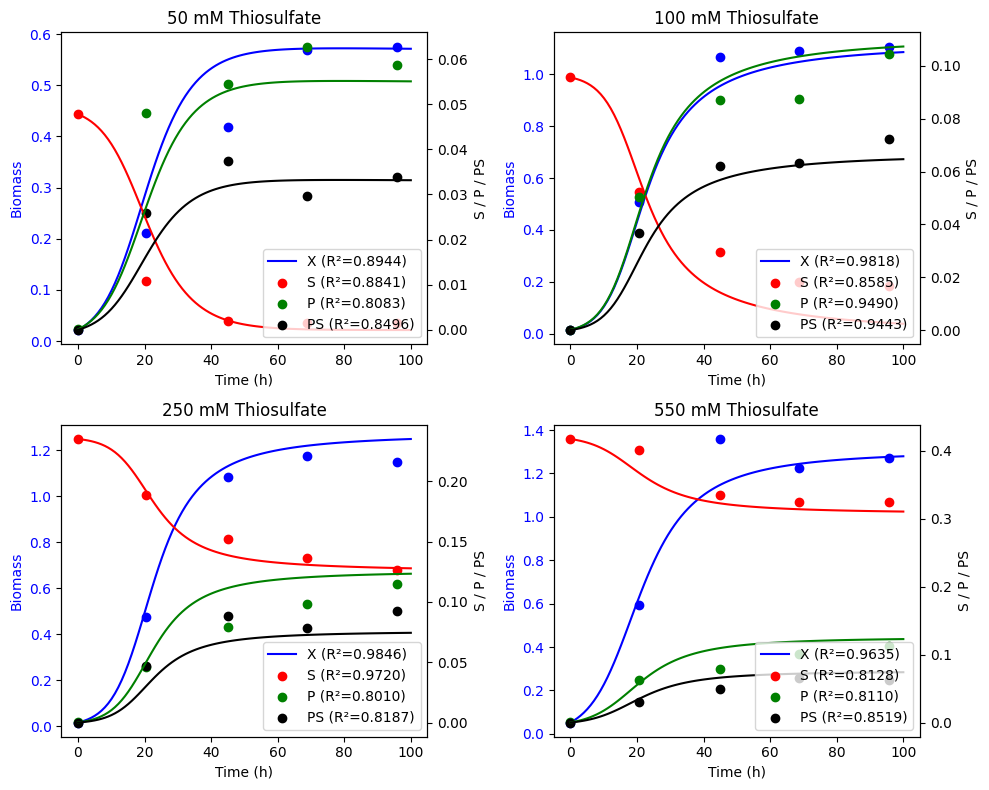

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit
from scipy.stats import t

# Fixed parameters
Yxs = 11.6
Yps = 1.16
Yp2s = 0.7
Ks_switch = 0.010
Yso4_s0 = 0.00000
n = 1.6  # Fixed inhibition exponent

# Dataset including PS (elemental sulfur)
datasets = {
    "50 mM": {
        "t": np.array([0.00, 20.58, 45.02, 68.72, 95.80]),
        "X": np.array([0.0215, 0.2108, 0.4188, 0.5684, 0.5757]),
        "S": np.array([0.0478, 0.0108, 0.0019, 0.0016, 0.0016]),
        "P": np.array([0.0001, 0.0481, 0.0544, 0.0628, 0.0586]),
        "PS": np.array([0.0000, 0.0259, 0.0375, 0.0297, 0.0339])
    },
    "100 mM": {
        "t": np.array([0.00, 20.58, 45.02, 68.72, 95.80]),
        "X": np.array([0.0139, 0.5066, 1.0658, 1.0895, 1.1076]),
        "S": np.array([0.0956, 0.0521, 0.0297, 0.0183, 0.0165]),
        "P": np.array([0.0001, 0.0502, 0.0870, 0.0874, 0.1046]),
        "PS": np.array([0.0000, 0.0367, 0.0620, 0.0631, 0.0724])
    },
    "250 mM": {
        "t": np.array([0.00, 20.58, 45.02, 68.72, 95.80]),
        "X": np.array([0.0169, 0.4748, 1.0830, 1.1761, 1.1483]),
        "S": np.array([0.2351, 0.1885, 0.1519, 0.1368, 0.1268]),
        "P": np.array([0.0001, 0.0460, 0.0789, 0.0983, 0.1146]),
        "PS": np.array([0.0000, 0.0472, 0.0883, 0.0783, 0.0921])
    },
    "550 mM": {
        "t": np.array([0.00, 20.58, 45.02, 68.72, 95.80]),
        "X": np.array([0.0523, 0.5935, 1.3589, 1.2242, 1.2698]),
        "S": np.array([0.4172, 0.4007, 0.3342, 0.3242, 0.3242]),
        "P": np.array([0.0001, 0.0628, 0.0783, 0.1003, 0.1128]),
        "PS": np.array([0.0000, 0.0299, 0.0499, 0.0657, 0.0631])
    }
}

# Model with PS, r_so, and fixed n
def model(y, t, u, Ks, Ki, Pso4_max, ms, k_so):
    X, S, P, Ps = y
    mu = ((u * S) / (Ks + S + ((S**2) / Ki))) * (max(1e-6, 1 - P / Pso4_max) ** n)
    dXdt = mu * X
    r_so = k_so * Ps * X if S < Ks_switch else 0
    dSdt = (dXdt * (-1 / Yxs)) - ms * X
    dPdt = dXdt * (Yps / Yxs) + Yso4_s0 * r_so
    dP2dt = dXdt * (Yp2s / Yxs) - r_so
    return [dXdt, dSdt, dPdt, dP2dt]

# Objective function across all datasets
def global_objective(all_t, u, Ks, Ki, Pso4_max, ms, k_so):
    all_predictions = []
    for data in datasets.values():
        t_data = data["t"]
        y0 = [data["X"][0], data["S"][0], data["P"][0], data["PS"][0]]
        sol = odeint(model, y0, t_data, args=(u, Ks, Ki, Pso4_max, ms, k_so))
        all_predictions.extend(sol[:, 0])  # X
        all_predictions.extend(sol[:, 1])  # S
        all_predictions.extend(sol[:, 2])  # P
        all_predictions.extend(sol[:, 3])  # PS
    return np.array(all_predictions)

# Combine all experimental data
all_exp_data = []
all_t_dummy = []
for data in datasets.values():
    all_t_dummy.extend(data["t"])
    all_exp_data.extend(data["X"])
    all_exp_data.extend(data["S"])
    all_exp_data.extend(data["P"])
    all_exp_data.extend(data["PS"])
all_exp_data = np.array(all_exp_data)
all_t_dummy = np.array(all_t_dummy)

# Initial guess and bounds for 6 parameters (n is fixed)
# initial_guess = [0.3, 0.05, 0.5, 0.100, 0.001, 0.001]  # u, Ks, Ki, Pso4_max, ms, k_so
# bounds = ([0.001, 0.001, 0.1, 0.01, 0.00002, 0.00001],
#           [5, 0.5, 3, 1, 0.01, 1.0])

initial_guess = [0.3, 0.05, 0.5, 0.100, 0.001, 0.001]  #Initial guess  # u, Ks, Ki, Pso4_max, ms, k_so
bounds = ([0.001, 0.001, 0.1, 0.01, 0.00001, 0.00001], #Lower bound
          [5, 0.5, 2, 1, 0.01, 1.0])                   #Upper bound

# Parameter fitting with covariance for CI
popt, pcov = curve_fit(
    lambda t, u, Ks, Ki, Pso4_max, ms, k_so: global_objective(t, u, Ks, Ki, Pso4_max, ms, k_so),
    all_t_dummy, all_exp_data,
    p0=initial_guess, bounds=bounds
)
u, Ks, Ki, Pso4_max, ms, k_so = popt

# Confidence interval calculation
dof = max(0, len(all_exp_data) - len(popt))
tval = t.ppf(0.975, dof) if dof > 0 else 1.96
perr = np.sqrt(np.diag(pcov))
ci_pm = tval * perr
param_names = ["μmax-H", "Ks", "Ki", "Pso4_max", "ms", "k_so"]

# Derived Haldane metrics
umax_true = u / (1 + 2*(Ks/Ki)**0.5)
S_max_h = (Ks * Ki)**0.5

print(f"\nJoint Fit Parameters (±95% CI):")
for i, name in enumerate(param_names):
    print(f"{name}: {popt[i]:.6g} ± {ci_pm[i]:.2g}")

print(f"μmax-true = {umax_true:.4f} h⁻¹")
print(f"n (fixed) = {n:.4f}")
print(f"S_max_h = {S_max_h:.4f} M")

# Plotting results
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, (key, data) in enumerate(datasets.items()):
    t_data = data["t"]
    y0 = [data["X"][0], data["S"][0], data["P"][0], data["PS"][0]]
    sol = odeint(model, y0, np.linspace(0, 100, 100),
                 args=(u, Ks, Ki, Pso4_max, ms, k_so))
    X_fit, S_fit, P_fit, PS_fit = sol.T

    def r2(y_true, y_pred):
        return 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)

    X_pred = np.interp(t_data, np.linspace(0, 100, 100), X_fit)
    S_pred = np.interp(t_data, np.linspace(0, 100, 100), S_fit)
    P_pred = np.interp(t_data, np.linspace(0, 100, 100), P_fit)
    PS_pred = np.interp(t_data, np.linspace(0, 100, 100), PS_fit)

    r2_X = r2(data["X"], X_pred)
    r2_S = r2(data["S"], S_pred)
    r2_P = r2(data["P"], P_pred)
    r2_PS = r2(data["PS"], PS_pred)

    ax = axes[i]
    ax2 = ax.twinx()
    ax.plot(np.linspace(0, 100, 100), X_fit, 'b-', label=f'X (R²={r2_X:.4f})')
    ax.scatter(t_data, data["X"], c='b')
    ax.set_ylabel("Biomass", color='b')
    ax.tick_params(axis='y', labelcolor='b')

    ax2.plot(np.linspace(0, 100, 100), S_fit, 'r-')
    ax2.plot(np.linspace(0, 100, 100), P_fit, 'g-')
    ax2.plot(np.linspace(0, 100, 100), PS_fit, 'k-')
    ax2.scatter(t_data, data["S"], c='r', label=f'S (R²={r2_S:.4f})')
    ax2.scatter(t_data, data["P"], c='g', label=f'P (R²={r2_P:.4f})')
    ax2.scatter(t_data, data["PS"], c='k', label=f'PS (R²={r2_PS:.4f})')
    ax2.set_ylabel("S / P / PS", color='k')
    ax2.tick_params(axis='y', labelcolor='k')

    ax.set_title(f"{key} Thiosulfate")
    ax.set_xlabel("Time (h)")

    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='lower right')

plt.tight_layout()
plt.show()


100 mM Biotransformation (Pso4-max predicted)

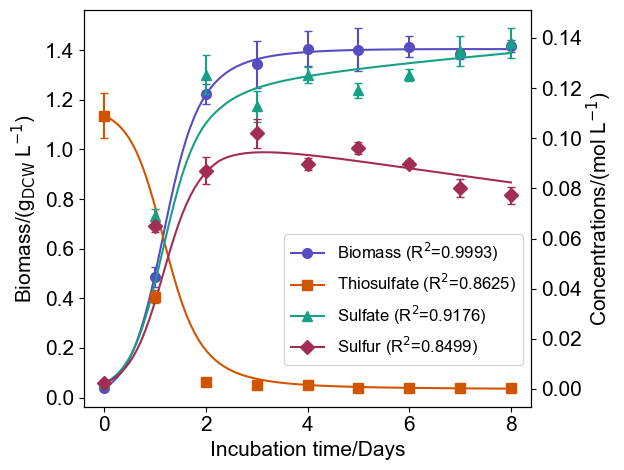

Fitted parameters:
μmax-H = 0.2023 h⁻¹
μmax-true = 0.1221 h⁻¹
Ki = 0.3184 mol/L
Ks = 0.0343 mol/L
k_so = 0.000996 L/g DCW-h
ms = 0.000004 mol S2O3/g DCW-h
Pso4_max = 0.1331 mol SO4/L
S_max_h = 0.1045 M

Fixed parameters: 
Yxs = 12.64 g DCW/mol S2O3 
Yps = 1.11 mol SO4/mol S2O3 
Yp2s = 0.9 mol S/mol S2O3 
Yso4_s0 = 0.7000 mol SO4/mol S
Ks_switch = 0.010000 mol/L 
n = 1.1

R2 values:
Biomass (X): 0.9993, Thiosulfate (S): 0.8625, Sulfate (P_SO4): 0.9176, Sulfur (P_S0): 0.8499

RMSE values:
Biomass (X): 0.0124, Thiosulfate (S): 0.0127, Sulfate (P_SO4): 0.0118, Sulfur (P_S0): 0.0109

At S = 0.010
interpolated X = 1.07050, interpolated PS = 0.08244
r_so = 0.00211, sulfur oxidation = 0.00148


In [6]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit
from matplotlib.lines import Line2D
from scipy.stats import sem, t

# Data
t_data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])  # in Days

# Triplicate raw data
X_trip = np.array([[0.0402, 0.4731, 1.2095, 1.3865, 1.4322, 1.3619, 1.4315, 1.3919, 1.4069],
       [0.0377, 0.4830, 1.2417, 1.3273, 1.3752, 1.4175, 1.3978, 1.3830, 1.4246],
       [0.0390, 0.5050, 1.2207, 1.3152, 1.4106, 1.4266, 1.4136, 1.3771, 1.4195]])

S_trip = np.array([[0.1067, 0.0377, 0.0028, 0.0017, 0.0016, 0.0005, 0.0005, 0.0005, 0.0005],
       [0.1132, 0.0372, 0.0030, 0.0016, 0.0014, 0.0005, 0.0005, 0.0005, 0.0005],
       [0.1072, 0.0357, 0.0030, 0.0018, 0.0015, 0.0005, 0.0005, 0.0005, 0.0005]])

P_trip = np.array([
    [0.0022, 0.0703, 0.1219, 0.1157, 0.1241, 0.1190, 0.1243, 0.1345, 0.1390],
    [0.0022, 0.0685, 0.1280, 0.1115, 0.1251, 0.1180, 0.1255, 0.1372, 0.1396],
    [0.0022, 0.0685, 0.1260, 0.1113, 0.1267, 0.1203, 0.1261, 0.1324, 0.1351]
])

PS_trip = np.array([
    [0.0022, 0.0663, 0.0846, 0.1045, 0.0889, 0.0959, 0.0890, 0.0802, 0.0778],
    [0.0022, 0.0645, 0.0889, 0.1007, 0.0895, 0.0951, 0.0898, 0.0818, 0.0782],
    [0.0022, 0.0645, 0.0875, 0.1005, 0.0907, 0.0970, 0.0902, 0.0789, 0.0756]
])

def mean_ci(data):
    mean = np.mean(data, axis=0)
    ci = sem(data, axis=0) * t.ppf(0.975, df=data.shape[0]-1)
    return mean, ci

X_data, X_err = mean_ci(X_trip)
S_data, S_err = mean_ci(S_trip)
P_data, P_err = mean_ci(P_trip)
PS_data, PS_err = mean_ci(PS_trip)

# === Fixed parameters ===
Yxs = 12.64
Yps = 1.11
Yp2s = 0.9
Yso4_s0 = 0.7
n = 1.1
Ks_switch = 0.010

# === Model with ms as parameter ===
def model(y, t, u, Ks, Ki, k_so, Pso4_max, ms):
    X, S, P, Ps = y
    mu = ((u * S) / (Ks + S + ((S**2) / Ki))) * (max(1e-6, 1 - P / Pso4_max) ** n)
    dXdt = mu * X
    r_so = k_so * Ps * X if S < Ks_switch else 0
    dPdt = dXdt * (Yps / Yxs) + Yso4_s0 * r_so
    dP2dt = dXdt * (Yp2s / Yxs) - r_so
    dSdt = - (dXdt / Yxs) - ms * X
    return [dXdt, dSdt, dPdt, dP2dt]

# Objective functions
def objective(t, u, Ks, Ki, k_so, Pso4_max, ms):
    y0 = [X_data[0], S_data[0], P_data[0], PS_data[0]]
    sol = odeint(model, y0, t, args=(u, Ks, Ki, k_so, Pso4_max, ms))
    return sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3]

def combined_objective(t, u, Ks, Ki, k_so, Pso4_max, ms):
    X, S, P, Ps = objective(t, u, Ks, Ki, k_so, Pso4_max, ms)
    return np.concatenate((X, S, P, Ps))

# Combine all experimental data
data = np.concatenate((X_data, S_data, P_data, PS_data))

# Fit parameters
initial_guess = [0.1, 0.001, 0.01, 0.1, 0.136, 0.0001]
bounds = ([0.001, 0.0001, 0.0001, 0.00001, 0.05, 0.0001], 
[5, 1, 3, 0.1, 1, 0.00011])

params, _ = curve_fit(combined_objective, t_data, data, p0=initial_guess, bounds=bounds)
u_fitted, Ks_fitted, Ki_fitted, k_so_fitted, Pso4_max_fitted, ms_fitted = params

# Simulate using fitted parameters
y0 = [X_data[0], S_data[0], P_data[0], PS_data[0]]
t_fine = np.linspace(0, 8, 100)
solution = odeint(model, y0, t_fine, args=(u_fitted, Ks_fitted, Ki_fitted, k_so_fitted, Pso4_max_fitted, ms_fitted))
X_fit, S_fit, P_fit, PS_fit = solution.T

# Interpolation and metrics
def calculate_r2(observed, predicted):
    return 1 - np.sum((observed - predicted) ** 2) / np.sum((observed - np.mean(observed)) ** 2)

def calculate_rmse(observed, predicted):
    return np.sqrt(np.mean((observed - predicted) ** 2))

X_pred = np.interp(t_data, t_fine, X_fit)
S_pred = np.interp(t_data, t_fine, S_fit)
P_pred = np.interp(t_data, t_fine, P_fit)
PS_pred = np.interp(t_data, t_fine, PS_fit)

r2_X = calculate_r2(X_data, X_pred)
r2_S = calculate_r2(S_data, S_pred)
r2_P = calculate_r2(P_data, P_pred)
r2_P2 = calculate_r2(PS_data, PS_pred)

rmse_X = calculate_rmse(X_data, X_pred)
rmse_S = calculate_rmse(S_data, S_pred)
rmse_P = calculate_rmse(P_data, P_pred)
rmse_P2 = calculate_rmse(PS_data, PS_pred)

# Updated palette from your image
colors = ['#574dc0', '#d35400', '#16a085', '#a12d54']

plt.rcParams['font.family'] = 'Arial'

fig, ax1 = plt.subplots()
marker_size = 7  # Adjust marker size here

# Biomass
ax1.plot(t_fine, X_fit, '-', color=colors[0])
ax1.errorbar(t_data, X_data, yerr=X_err, fmt='o',
             markerfacecolor=colors[0], markeredgecolor=colors[0],
             ecolor=colors[0], capsize=3, markersize=marker_size)

ax1.set_xlabel('Incubation time/Days', fontsize=15)
ax1.set_ylabel(r'Biomass/(g$_{\mathrm{DCW}}$ L$^{-1}$)', fontsize=15)
ax1.tick_params(axis='y', labelsize=15)
ax1.tick_params(axis='x', labelsize=15)

ax2 = ax1.twinx()
# Thiosulfate
ax2.plot(t_fine, S_fit, '-', color=colors[1])  # Solid line
ax2.errorbar(t_data, S_data, yerr=S_err, fmt='s',
             markerfacecolor=colors[1], markeredgecolor=colors[1],
             ecolor=colors[1], capsize=3, markersize=marker_size)
# Sulfate
ax2.plot(t_fine, P_fit, '-', color=colors[2])  # Solid line
ax2.errorbar(t_data, P_data, yerr=P_err, fmt='^',
             markerfacecolor=colors[2], markeredgecolor=colors[2],
             ecolor=colors[2], capsize=3, markersize=marker_size)
# Sulfur (diamond marker)
ax2.plot(t_fine, PS_fit, '-', color=colors[3])  # Solid line
ax2.errorbar(t_data, PS_data, yerr=PS_err, fmt='D',
             markerfacecolor=colors[3], markeredgecolor=colors[3],
             ecolor=colors[3], capsize=3, markersize=marker_size)

ax2.set_ylabel(r'Concentrations/(mol L$^{-1}$)', color='k', fontsize=15)
ax2.tick_params(axis='y', labelcolor='k', labelsize=15)
ax2.yaxis.set_label_coords(1.12, 0.5)

legend_marker_size = 7
legend_elements = [
    Line2D([0], [0], color=colors[0], marker='o', linestyle='-', label=f'Biomass (R$^2$={r2_X:.4f})',
           markerfacecolor=colors[0], markersize=legend_marker_size),
    Line2D([0], [0], color=colors[1], marker='s', linestyle='-', label=f'Thiosulfate (R$^2$={r2_S:.4f})',
           markerfacecolor=colors[1], markersize=legend_marker_size),
    Line2D([0], [0], color=colors[2], marker='^', linestyle='-', label=f'Sulfate (R$^2$={r2_P:.4f})',
           markerfacecolor=colors[2], markersize=legend_marker_size),
    Line2D([0], [0], color=colors[3], marker='D', linestyle='-', label=f'Sulfur (R$^2$={r2_P2:.4f})',
           markerfacecolor=colors[3], markersize=legend_marker_size)
]

fig.tight_layout()
fig.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1, 0.27),
           bbox_transform=ax1.transAxes, fontsize=12)


# Save as TIFF (high DPI for publication quality)
fig.savefig('Figures/100 mM - Biotransformation.svg', format='svg', dpi=2000)


plt.show()

# Derived metrics
umax_true = u_fitted / (1 + 2 * (Ks_fitted / Ki_fitted)**0.5)
S_max_h = (Ks_fitted * Ki_fitted)**0.5

# Output
print(f"Fitted parameters:")
print(f"μmax-H = {u_fitted/24:.4f} h⁻¹")
print(f"μmax-true = {umax_true/24:.4f} h⁻¹")
print(f"Ki = {Ki_fitted:.4f} mol/L")
print(f"Ks = {Ks_fitted:.4f} mol/L")
print(f"k_so = {k_so_fitted/24:.6f} L/g DCW-h")
print(f"ms = {ms_fitted/24:.6f} mol S2O3/g DCW-h")
print(f"Pso4_max = {Pso4_max_fitted:.4f} mol SO4/L")
print(f"S_max_h = {S_max_h:.4f} M")

print(f"\nFixed parameters: \nYxs = {Yxs} g DCW/mol S2O3 \nYps = {Yps} mol SO4/mol S2O3 \nYp2s = {Yp2s} mol S/mol S2O3 \nYso4_s0 = {Yso4_s0:.4f} mol SO4/mol S")
print(f"Ks_switch = {Ks_switch:.6f} mol/L \nn = {n}")

print(f"\nR2 values:")
print(f"Biomass (X): {r2_X:.4f}, Thiosulfate (S): {r2_S:.4f}, Sulfate (P_SO4): {r2_P:.4f}, Sulfur (P_S0): {r2_P2:.4f}")

print(f"\nRMSE values:")
print(f"Biomass (X): {rmse_X:.4f}, Thiosulfate (S): {rmse_S:.4f}, Sulfate (P_SO4): {rmse_P:.4f}, Sulfur (P_S0): {rmse_P2:.4f}\n")

# The target S value
target_S = Ks_switch

# Interpolate X and PS at S = target_S
# np.interp(x, xp, fp): x is the desired point, xp is the known x (S_data), fp is the known y (X_data or PS_data)

# Make sure S_data is sorted in increasing order for interpolation
sort_idx = np.argsort(S_data)
S_sorted = S_data[sort_idx]
X_sorted = X_data[sort_idx]
PS_sorted = PS_data[sort_idx]

X_at_S_target = np.interp(target_S, S_sorted, X_sorted)
PS_at_S_target = np.interp(target_S, S_sorted, PS_sorted)

print(f"At S = {target_S:.3f}")

# Example k_so value (update if you have a specific value)
r_so_target = k_so_fitted * PS_at_S_target * X_at_S_target
r_so_so4 = r_so_target * Yso4_s0
print(f"interpolated X = {X_at_S_target:.5f}, interpolated PS = {PS_at_S_target:.5f}\nr_so = {r_so_target:.5f}, sulfur oxidation ={r_so_so4: .5f}")



100 mM Biotransfromation with CI output


Fitted parameters (95% CI, ± notation, hourly for u, k_so, ms):
u (/h): 0.202254 ± 0.97
Ks: 0.034291 ± 0.36
Ki: 0.318425 ± 4.5
k_so (/h): 0.000996324 ± 0.001
Pso4_max: 0.133051 ± 0.073
ms (/h): 4.16667e-06 ± 6.4e-05


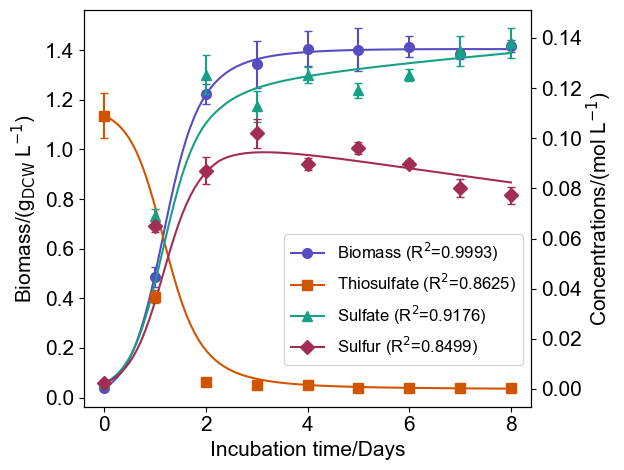

Maximum TUR: 13.689109684932687 mM S2O3/h


Fitted parameters (point estimates):
μmax-H = 0.2023 h⁻¹
μmax-true = 0.1221 h⁻¹
Ki = 0.3184 mol/L
Ks = 0.0343 mol/L
k_so = 0.000996 L/g DCW-h
ms = 0.000004 mol S2O3/g DCW-h
Pso4_max = 0.1331 mol SO4/L
S_max_h = 0.1045 M

Fixed parameters: 
Yxs = 12.64 g DCW/mol S2O3 
Yps = 1.11 mol SO4/mol S2O3 
Yp2s = 0.9 mol S/mol S2O3 
Yso4_s0 = 0.7000 mol SO4/mol S
Ks_switch = 0.010000 mol/L 
n = 1.1

R2 values:
Biomass (X): 0.9993, Thiosulfate (S): 0.8625, Sulfate (P_SO4): 0.9176, Sulfur (P_S0): 0.8499

RMSE values:
Biomass (X): 0.0124, Thiosulfate (S): 0.0127, Sulfate (P_SO4): 0.0118, Sulfur (P_S0): 0.0109

At S = 0.010
interpolated X = 1.07050, interpolated PS = 0.08244
r_so = 0.00211, sulfur oxidation = 0.00148


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit
from matplotlib.lines import Line2D
from scipy.stats import sem, t

# Data
t_data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])  # in Days


# Triplicate raw data
X_trip = np.array([[0.0402, 0.4731, 1.2095, 1.3865, 1.4322, 1.3619, 1.4315, 1.3919, 1.4069],
       [0.0377, 0.4830, 1.2417, 1.3273, 1.3752, 1.4175, 1.3978, 1.3830, 1.4246],
       [0.0390, 0.5050, 1.2207, 1.3152, 1.4106, 1.4266, 1.4136, 1.3771, 1.4195]])

S_trip = np.array([[0.1067, 0.0377, 0.0028, 0.0017, 0.0016, 0.0005, 0.0005, 0.0005, 0.0005],
       [0.1132, 0.0372, 0.0030, 0.0016, 0.0014, 0.0005, 0.0005, 0.0005, 0.0005],
       [0.1072, 0.0357, 0.0030, 0.0018, 0.0015, 0.0005, 0.0005, 0.0005, 0.0005]])

P_trip = np.array([
    [0.0022, 0.0703, 0.1219, 0.1157, 0.1241, 0.1190, 0.1243, 0.1345, 0.1390],
    [0.0022, 0.0685, 0.1280, 0.1115, 0.1251, 0.1180, 0.1255, 0.1372, 0.1396],
    [0.0022, 0.0685, 0.1260, 0.1113, 0.1267, 0.1203, 0.1261, 0.1324, 0.1351]
])

PS_trip = np.array([
    [0.0022, 0.0663, 0.0846, 0.1045, 0.0889, 0.0959, 0.0890, 0.0802, 0.0778],
    [0.0022, 0.0645, 0.0889, 0.1007, 0.0895, 0.0951, 0.0898, 0.0818, 0.0782],
    [0.0022, 0.0645, 0.0875, 0.1005, 0.0907, 0.0970, 0.0902, 0.0789, 0.0756]
])


def mean_ci(data):
    mean = np.mean(data, axis=0)
    ci = sem(data, axis=0) * t.ppf(0.975, df=data.shape[0]-1)
    return mean, ci

X_data, X_err = mean_ci(X_trip)
S_data, S_err = mean_ci(S_trip)
P_data, P_err = mean_ci(P_trip)
PS_data, PS_err = mean_ci(PS_trip)

# === Fixed parameters ===
Yxs = 12.64
Yps = 1.11
Yp2s = 0.9
Yso4_s0 = 0.7
n = 1.1
Ks_switch = 0.010

# === Model with ms as parameter ===
def model(y, t, u, Ks, Ki, k_so, Pso4_max, ms):
    X, S, P, Ps = y
    mu = ((u * S) / (Ks + S + ((S**2) / Ki))) * (max(1e-6, 1 - P / Pso4_max) ** n)
    dXdt = mu * X
    r_so = k_so * Ps * X if S < Ks_switch else 0
    dPdt = dXdt * (Yps / Yxs) + Yso4_s0 * r_so
    dP2dt = dXdt * (Yp2s / Yxs) - r_so
    dSdt = - (dXdt / Yxs) - ms * X
    return [dXdt, dSdt, dPdt, dP2dt]

# Objective functions
def objective(t, u, Ks, Ki, k_so, Pso4_max, ms):
    y0 = [X_data[0], S_data[0], P_data[0], PS_data[0]]
    sol = odeint(model, y0, t, args=(u, Ks, Ki, k_so, Pso4_max, ms))
    return sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3]

def combined_objective(t, u, Ks, Ki, k_so, Pso4_max, ms):
    X, S, P, Ps = objective(t, u, Ks, Ki, k_so, Pso4_max, ms)
    return np.concatenate((X, S, P, Ps))

# Combine all experimental data
data = np.concatenate((X_data, S_data, P_data, PS_data))

# Fit parameters and get covariance matrix for CIs
initial_guess = [0.1, 0.001, 0.01, 0.1, 0.136, 0.0001]
bounds = ([0.001, 0.0001, 0.0001, 0.00001, 0.05, 0.0001], 
          [5, 1, 3, 0.1, 1, 0.00011])

params, pcov = curve_fit(combined_objective, t_data, data, p0=initial_guess, bounds=bounds)
u_fitted, Ks_fitted, Ki_fitted, k_so_fitted, Pso4_max_fitted, ms_fitted = params

# Confidence intervals for parameters (plus-minus notation)
dof = max(0, len(data) - len(params))
tval = t.ppf(0.975, dof) if dof > 0 else 1.96
perr = np.sqrt(np.diag(pcov))
ci_pm = tval * perr  # "plus-minus" value

param_names = ["u", "Ks", "Ki", "k_so", "Pso4_max", "ms"]

print("\nFitted parameters (95% CI, ± notation, hourly for u, k_so, ms):")
for i, name in enumerate(param_names):
    if name in ['u', 'k_so', 'ms']:
        val = params[i] / 24
        err = ci_pm[i] / 24
        print(f"{name} (/h): {val:.6g} ± {err:.2g}")
    else:
        val = params[i]
        err = ci_pm[i]
        print(f"{name}: {val:.6g} ± {err:.2g}")


# Simulate using fitted parameters
y0 = [X_data[0], S_data[0], P_data[0], PS_data[0]]
t_fine = np.linspace(0, 8, 100)
solution = odeint(model, y0, t_fine, args=(u_fitted, Ks_fitted, Ki_fitted, k_so_fitted, Pso4_max_fitted, ms_fitted))
X_fit, S_fit, P_fit, PS_fit = solution.T

# Interpolation and metrics
def calculate_r2(observed, predicted):
    return 1 - np.sum((observed - predicted) ** 2) / np.sum((observed - np.mean(observed)) ** 2)

def calculate_rmse(observed, predicted):
    return np.sqrt(np.mean((observed - predicted) ** 2))

X_pred = np.interp(t_data, t_fine, X_fit)
S_pred = np.interp(t_data, t_fine, S_fit)
P_pred = np.interp(t_data, t_fine, P_fit)
PS_pred = np.interp(t_data, t_fine, PS_fit)

r2_X = calculate_r2(X_data, X_pred)
r2_S = calculate_r2(S_data, S_pred)
r2_P = calculate_r2(P_data, P_pred)
r2_P2 = calculate_r2(PS_data, PS_pred)

rmse_X = calculate_rmse(X_data, X_pred)
rmse_S = calculate_rmse(S_data, S_pred)
rmse_P = calculate_rmse(P_data, P_pred)
rmse_P2 = calculate_rmse(PS_data, PS_pred)

# Updated palette from your image
colors = ['#574dc0', '#d35400', '#16a085', '#a12d54']

plt.rcParams['font.family'] = 'Arial'

fig, ax1 = plt.subplots()
marker_size = 7  # Adjust marker size here

# Biomass
ax1.plot(t_fine, X_fit, '-', color=colors[0])
ax1.errorbar(t_data, X_data, yerr=X_err, fmt='o',
             markerfacecolor=colors[0], markeredgecolor=colors[0],
             ecolor=colors[0], capsize=3, markersize=marker_size)

ax1.set_xlabel('Incubation time/Days', fontsize=15)
ax1.set_ylabel(r'Biomass/(g$_{\mathrm{DCW}}$ L$^{-1}$)', fontsize=15)
ax1.tick_params(axis='y', labelsize=15)
ax1.tick_params(axis='x', labelsize=15)

ax2 = ax1.twinx()
# Thiosulfate
ax2.plot(t_fine, S_fit, '-', color=colors[1])  # Solid line
ax2.errorbar(t_data, S_data, yerr=S_err, fmt='s',
             markerfacecolor=colors[1], markeredgecolor=colors[1],
             ecolor=colors[1], capsize=3, markersize=marker_size)
# Sulfate
ax2.plot(t_fine, P_fit, '-', color=colors[2])  # Solid line
ax2.errorbar(t_data, P_data, yerr=P_err, fmt='^',
             markerfacecolor=colors[2], markeredgecolor=colors[2],
             ecolor=colors[2], capsize=3, markersize=marker_size)
# Sulfur (diamond marker)
ax2.plot(t_fine, PS_fit, '-', color=colors[3])  # Solid line
ax2.errorbar(t_data, PS_data, yerr=PS_err, fmt='D',
             markerfacecolor=colors[3], markeredgecolor=colors[3],
             ecolor=colors[3], capsize=3, markersize=marker_size)

ax2.set_ylabel(r'Concentrations/(mol L$^{-1}$)', color='k', fontsize=15)
ax2.tick_params(axis='y', labelcolor='k', labelsize=15)
ax2.yaxis.set_label_coords(1.12, 0.5)

legend_marker_size = 7
legend_elements = [
    Line2D([0], [0], color=colors[0], marker='o', linestyle='-', label=f'Biomass (R$^2$={r2_X:.4f})',
           markerfacecolor=colors[0], markersize=legend_marker_size),
    Line2D([0], [0], color=colors[1], marker='s', linestyle='-', label=f'Thiosulfate (R$^2$={r2_S:.4f})',
           markerfacecolor=colors[1], markersize=legend_marker_size),
    Line2D([0], [0], color=colors[2], marker='^', linestyle='-', label=f'Sulfate (R$^2$={r2_P:.4f})',
           markerfacecolor=colors[2], markersize=legend_marker_size),
    Line2D([0], [0], color=colors[3], marker='D', linestyle='-', label=f'Sulfur (R$^2$={r2_P2:.4f})',
           markerfacecolor=colors[3], markersize=legend_marker_size)
]

fig.tight_layout()
fig.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1, 0.27),
           bbox_transform=ax1.transAxes, fontsize=12)


plt.show()

# Derived metrics
umax_true = u_fitted / (1 + 2 * (Ks_fitted / Ki_fitted)**0.5)
S_max_h = (Ks_fitted * Ki_fitted)**0.5
TUR = ((umax_true/24) * X_data/Yxs)* 1000 #in mM S2O3/h
SPR = umax_true * X_data * Yps/Yxs
SP2R = umax_true * X_data * Yp2s/Yxs
print(f"Maximum TUR: {max(TUR)} mM S2O3/h\n")

print(f"\nFitted parameters (point estimates):")
print(f"μmax-H = {u_fitted/24:.4f} h⁻¹")
print(f"μmax-true = {umax_true/24:.4f} h⁻¹")
print(f"Ki = {Ki_fitted:.4f} mol/L")
print(f"Ks = {Ks_fitted:.4f} mol/L")
print(f"k_so = {k_so_fitted/24:.6f} L/g DCW-h")
print(f"ms = {ms_fitted/24:.6f} mol S2O3/g DCW-h")
print(f"Pso4_max = {Pso4_max_fitted:.4f} mol SO4/L")
print(f"S_max_h = {S_max_h:.4f} M")

print(f"\nFixed parameters: \nYxs = {Yxs} g DCW/mol S2O3 \nYps = {Yps} mol SO4/mol S2O3 \nYp2s = {Yp2s} mol S/mol S2O3 \nYso4_s0 = {Yso4_s0:.4f} mol SO4/mol S")
print(f"Ks_switch = {Ks_switch:.6f} mol/L \nn = {n}")

print(f"\nR2 values:")
print(f"Biomass (X): {r2_X:.4f}, Thiosulfate (S): {r2_S:.4f}, Sulfate (P_SO4): {r2_P:.4f}, Sulfur (P_S0): {r2_P2:.4f}")

print(f"\nRMSE values:")
print(f"Biomass (X): {rmse_X:.4f}, Thiosulfate (S): {rmse_S:.4f}, Sulfate (P_SO4): {rmse_P:.4f}, Sulfur (P_S0): {rmse_P2:.4f}\n")

# The target S value
target_S = Ks_switch

# Interpolate X and PS at S = target_S
sort_idx = np.argsort(S_data)
S_sorted = S_data[sort_idx]
X_sorted = X_data[sort_idx]
PS_sorted = PS_data[sort_idx]

X_at_S_target = np.interp(target_S, S_sorted, X_sorted)
PS_at_S_target = np.interp(target_S, S_sorted, PS_sorted)

print(f"At S = {target_S:.3f}")

r_so_target = k_so_fitted * PS_at_S_target * X_at_S_target
r_so_so4 = r_so_target * Yso4_s0
print(f"interpolated X = {X_at_S_target:.5f}, interpolated PS = {PS_at_S_target:.5f}\nr_so = {r_so_target:.5f}, sulfur oxidation ={r_so_so4: .5f}")


100 mM Biotransformation (No CI bars)

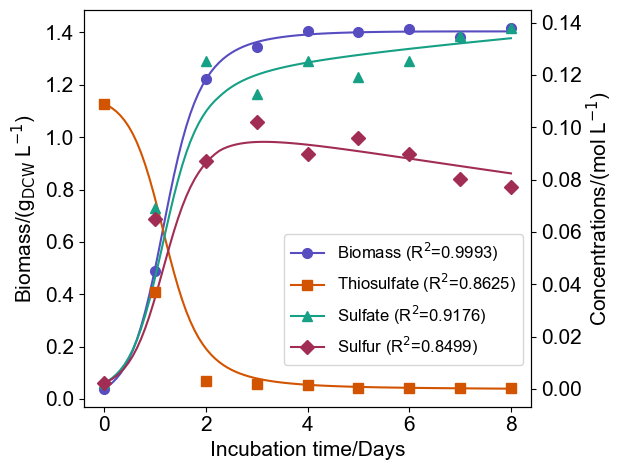

Fitted parameters:
μmax-H = 0.2023 h⁻¹
μmax-true = 0.1221 h⁻¹
Ki = 0.3184 mol/L
Ks = 0.0343 mol/L
k_so = 0.000996 L/g DCW-h
ms = 0.000004 mol S2O3/g DCW-h
Pso4_max = 0.1331 mol SO4/L
S_max_h = 0.1045 M

Fixed parameters: 
Yxs = 12.64 g DCW/mol S2O3 
Yps = 1.11 mol SO4/mol S2O3 
Yp2s = 0.9 mol S/mol S2O3 
Yso4_s0 = 0.7000 mol SO4/mol S
Ks_switch = 0.010000 mol/L 
n = 1.1

R2 values:
Biomass (X): 0.9993, Thiosulfate (S): 0.8625, Sulfate (P_SO4): 0.9176, Sulfur (P_S0): 0.8499

RMSE values:
Biomass (X): 0.0124, Thiosulfate (S): 0.0127, Sulfate (P_SO4): 0.0118, Sulfur (P_S0): 0.0109

At S = 0.010
interpolated X = 1.07050, interpolated PS = 0.08244
r_so = 0.00211, sulfur oxidation = 0.00148


In [8]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit
from matplotlib.lines import Line2D
from scipy.stats import sem, t

# Data
t_data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])  # in Days

# Triplicate raw data
X_trip = np.array([[0.0402, 0.4731, 1.2095, 1.3865, 1.4322, 1.3619, 1.4315, 1.3919, 1.4069],
       [0.0377, 0.4830, 1.2417, 1.3273, 1.3752, 1.4175, 1.3978, 1.3830, 1.4246],
       [0.0390, 0.5050, 1.2207, 1.3152, 1.4106, 1.4266, 1.4136, 1.3771, 1.4195]])

S_trip = np.array([[0.1067, 0.0377, 0.0028, 0.0017, 0.0016, 0.0005, 0.0005, 0.0005, 0.0005],
       [0.1132, 0.0372, 0.0030, 0.0016, 0.0014, 0.0005, 0.0005, 0.0005, 0.0005],
       [0.1072, 0.0357, 0.0030, 0.0018, 0.0015, 0.0005, 0.0005, 0.0005, 0.0005]])

P_trip = np.array([
    [0.0022, 0.0703, 0.1219, 0.1157, 0.1241, 0.1190, 0.1243, 0.1345, 0.1390],
    [0.0022, 0.0685, 0.1280, 0.1115, 0.1251, 0.1180, 0.1255, 0.1372, 0.1396],
    [0.0022, 0.0685, 0.1260, 0.1113, 0.1267, 0.1203, 0.1261, 0.1324, 0.1351]
])

PS_trip = np.array([
    [0.0022, 0.0663, 0.0846, 0.1045, 0.0889, 0.0959, 0.0890, 0.0802, 0.0778],
    [0.0022, 0.0645, 0.0889, 0.1007, 0.0895, 0.0951, 0.0898, 0.0818, 0.0782],
    [0.0022, 0.0645, 0.0875, 0.1005, 0.0907, 0.0970, 0.0902, 0.0789, 0.0756]
])

def mean_ci(data):
    mean = np.mean(data, axis=0)
    ci = sem(data, axis=0) * t.ppf(0.975, df=data.shape[0]-1)
    return mean, ci

X_data, X_err = mean_ci(X_trip)
S_data, S_err = mean_ci(S_trip)
P_data, P_err = mean_ci(P_trip)
PS_data, PS_err = mean_ci(PS_trip)

# === Fixed parameters ===
Yxs = 12.64
Yps = 1.11
Yp2s = 0.9
Yso4_s0 = 0.7
n = 1.1
Ks_switch = 0.010

# === Model with ms as parameter ===
def model(y, t, u, Ks, Ki, k_so, Pso4_max, ms):
    X, S, P, Ps = y
    mu = ((u * S) / (Ks + S + ((S**2) / Ki))) * (max(1e-6, 1 - P / Pso4_max) ** n)
    dXdt = mu * X
    r_so = k_so * Ps * X if S < Ks_switch else 0
    dPdt = dXdt * (Yps / Yxs) + Yso4_s0 * r_so
    dP2dt = dXdt * (Yp2s / Yxs) - r_so
    dSdt = - (dXdt / Yxs) - ms * X
    return [dXdt, dSdt, dPdt, dP2dt]

# Objective functions
def objective(t, u, Ks, Ki, k_so, Pso4_max, ms):
    y0 = [X_data[0], S_data[0], P_data[0], PS_data[0]]
    sol = odeint(model, y0, t, args=(u, Ks, Ki, k_so, Pso4_max, ms))
    return sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3]

def combined_objective(t, u, Ks, Ki, k_so, Pso4_max, ms):
    X, S, P, Ps = objective(t, u, Ks, Ki, k_so, Pso4_max, ms)
    return np.concatenate((X, S, P, Ps))

# Combine all experimental data
data = np.concatenate((X_data, S_data, P_data, PS_data))

# Fit parameters
initial_guess = [0.1, 0.001, 0.01, 0.1, 0.136, 0.0001]
bounds = ([0.001, 0.0001, 0.0001, 0.00001, 0.05, 0.0001], 
[5, 1, 3, 0.1, 1, 0.00011])

params, _ = curve_fit(combined_objective, t_data, data, p0=initial_guess, bounds=bounds)
u_fitted, Ks_fitted, Ki_fitted, k_so_fitted, Pso4_max_fitted, ms_fitted = params

# Simulate using fitted parameters
y0 = [X_data[0], S_data[0], P_data[0], PS_data[0]]
t_fine = np.linspace(0, 8, 100)
solution = odeint(model, y0, t_fine, args=(u_fitted, Ks_fitted, Ki_fitted, k_so_fitted, Pso4_max_fitted, ms_fitted))
X_fit, S_fit, P_fit, PS_fit = solution.T

# Interpolation and metrics
def calculate_r2(observed, predicted):
    return 1 - np.sum((observed - predicted) ** 2) / np.sum((observed - np.mean(observed)) ** 2)

def calculate_rmse(observed, predicted):
    return np.sqrt(np.mean((observed - predicted) ** 2))

X_pred = np.interp(t_data, t_fine, X_fit)
S_pred = np.interp(t_data, t_fine, S_fit)
P_pred = np.interp(t_data, t_fine, P_fit)
PS_pred = np.interp(t_data, t_fine, PS_fit)

r2_X = calculate_r2(X_data, X_pred)
r2_S = calculate_r2(S_data, S_pred)
r2_P = calculate_r2(P_data, P_pred)
r2_P2 = calculate_r2(PS_data, PS_pred)

rmse_X = calculate_rmse(X_data, X_pred)
rmse_S = calculate_rmse(S_data, S_pred)
rmse_P = calculate_rmse(P_data, P_pred)
rmse_P2 = calculate_rmse(PS_data, PS_pred)

# Updated palette from your image
colors = ['#574dc0', '#d35400', '#16a085', '#a12d54']

plt.rcParams['font.family'] = 'Arial'

fig, ax1 = plt.subplots()
marker_size = 7  # Adjust marker size here

# Biomass
ax1.plot(t_fine, X_fit, '-', color=colors[0])
ax1.errorbar(t_data, X_data, fmt='o',
             markerfacecolor=colors[0], markeredgecolor=colors[0],
             ecolor=colors[0], capsize=3, markersize=marker_size)

ax1.set_xlabel('Incubation time/Days', fontsize=15)
ax1.set_ylabel(r'Biomass/(g$_{\mathrm{DCW}}$ L$^{-1}$)', fontsize=15)
ax1.tick_params(axis='y', labelsize=15)
ax1.tick_params(axis='x', labelsize=15)

ax2 = ax1.twinx()
# Thiosulfate
ax2.plot(t_fine, S_fit, '-', color=colors[1])  # Solid line
ax2.errorbar(t_data, S_data, fmt='s',
             markerfacecolor=colors[1], markeredgecolor=colors[1],
             ecolor=colors[1], capsize=3, markersize=marker_size)
# Sulfate
ax2.plot(t_fine, P_fit, '-', color=colors[2])  # Solid line
ax2.errorbar(t_data, P_data, fmt='^',
             markerfacecolor=colors[2], markeredgecolor=colors[2],
             ecolor=colors[2], capsize=3, markersize=marker_size)
# Sulfur (diamond marker)
ax2.plot(t_fine, PS_fit, '-', color=colors[3])  # Solid line
ax2.errorbar(t_data, PS_data, fmt='D',
             markerfacecolor=colors[3], markeredgecolor=colors[3],
             ecolor=colors[3], capsize=3, markersize=marker_size)

ax2.set_ylabel(r'Concentrations/(mol L$^{-1}$)', color='k', fontsize=15)
ax2.tick_params(axis='y', labelcolor='k', labelsize=15)
ax2.yaxis.set_label_coords(1.12, 0.5)

legend_marker_size = 7
legend_elements = [
    Line2D([0], [0], color=colors[0], marker='o', linestyle='-', label=f'Biomass (R$^2$={r2_X:.4f})',
           markerfacecolor=colors[0], markersize=legend_marker_size),
    Line2D([0], [0], color=colors[1], marker='s', linestyle='-', label=f'Thiosulfate (R$^2$={r2_S:.4f})',
           markerfacecolor=colors[1], markersize=legend_marker_size),
    Line2D([0], [0], color=colors[2], marker='^', linestyle='-', label=f'Sulfate (R$^2$={r2_P:.4f})',
           markerfacecolor=colors[2], markersize=legend_marker_size),
    Line2D([0], [0], color=colors[3], marker='D', linestyle='-', label=f'Sulfur (R$^2$={r2_P2:.4f})',
           markerfacecolor=colors[3], markersize=legend_marker_size)
]

fig.tight_layout()
fig.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1, 0.27),
           bbox_transform=ax1.transAxes, fontsize=12)


# Save as TIFF (high DPI for publication quality)
fig.savefig('Figures/100 mM - Biotransformation - No Errobar.svg', format='svg', dpi=2000)


plt.show()

# Derived metrics
umax_true = u_fitted / (1 + 2 * (Ks_fitted / Ki_fitted)**0.5)
S_max_h = (Ks_fitted * Ki_fitted)**0.5

# Output
print(f"Fitted parameters:")
print(f"μmax-H = {u_fitted/24:.4f} h⁻¹")
print(f"μmax-true = {umax_true/24:.4f} h⁻¹")
print(f"Ki = {Ki_fitted:.4f} mol/L")
print(f"Ks = {Ks_fitted:.4f} mol/L")
print(f"k_so = {k_so_fitted/24:.6f} L/g DCW-h")
print(f"ms = {ms_fitted/24:.6f} mol S2O3/g DCW-h")
print(f"Pso4_max = {Pso4_max_fitted:.4f} mol SO4/L")
print(f"S_max_h = {S_max_h:.4f} M")

print(f"\nFixed parameters: \nYxs = {Yxs} g DCW/mol S2O3 \nYps = {Yps} mol SO4/mol S2O3 \nYp2s = {Yp2s} mol S/mol S2O3 \nYso4_s0 = {Yso4_s0:.4f} mol SO4/mol S")
print(f"Ks_switch = {Ks_switch:.6f} mol/L \nn = {n}")

print(f"\nR2 values:")
print(f"Biomass (X): {r2_X:.4f}, Thiosulfate (S): {r2_S:.4f}, Sulfate (P_SO4): {r2_P:.4f}, Sulfur (P_S0): {r2_P2:.4f}")

print(f"\nRMSE values:")
print(f"Biomass (X): {rmse_X:.4f}, Thiosulfate (S): {rmse_S:.4f}, Sulfate (P_SO4): {rmse_P:.4f}, Sulfur (P_S0): {rmse_P2:.4f}\n")

# The target S value
target_S = Ks_switch

# Interpolate X and PS at S = target_S
# np.interp(x, xp, fp): x is the desired point, xp is the known x (S_data), fp is the known y (X_data or PS_data)

# Make sure S_data is sorted in increasing order for interpolation
sort_idx = np.argsort(S_data)
S_sorted = S_data[sort_idx]
X_sorted = X_data[sort_idx]
PS_sorted = PS_data[sort_idx]

X_at_S_target = np.interp(target_S, S_sorted, X_sorted)
PS_at_S_target = np.interp(target_S, S_sorted, PS_sorted)

print(f"At S = {target_S:.3f}")

# Example k_so value (update if you have a specific value)
r_so_target = k_so_fitted * PS_at_S_target * X_at_S_target
r_so_so4 = r_so_target * Yso4_s0
print(f"interpolated X = {X_at_S_target:.5f}, interpolated PS = {PS_at_S_target:.5f}\nr_so = {r_so_target:.5f}, sulfur oxidation ={r_so_so4: .5f}")

